In [204]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from util_dnn import *

In [217]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

num_px = 64

tx = []
ty = []
tx_orig = []
xfiles = []

import os
for root, dirs, files in os.walk("./datasets", topdown=False):
    for item in [name for name in files if name.endswith(".png")] :
        y = item[item.index('-') + 1 : item.index('.')]
        fname = root + "/" + item
        print(fname, y)
        xfiles.append(fname)
        image = np.array(ndimage.imread(fname, flatten=False))
        tx_orig.append(image)
        my_image = scipy.misc.imresize(image, size=(num_px,num_px)) #.reshape((num_px*num_px*3,1))
        #my_image = my_image/255. # NO need because it will transformed later on
        
        # remove the alpha channel
        if my_image.shape[2] == 4:
            my_image = my_image[:,:,:3]
            
        tx.append(my_image)
        ty.append(int(y))


#         print(my_image.shape)    
nty = np.array(ty).reshape(1, -1)
ntx = np.array(tx)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
./datasets/ss1-1.png 1
./datasets/ss10-1.png 1
./datasets/ss11-0.png 0
./datasets/ss12-0.png 0
./datasets/ss2-0.png 0


C:\Users\tmoreno\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
C:\Users\tmoreno\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.


./datasets/ss3-1.png 1
./datasets/ss4-1.png 1
./datasets/ss5-1.png 1
./datasets/ss6-0.png 0
./datasets/ss7-0.png 0
./datasets/ss8-0.png 0
./datasets/ss9-1.png 1
./datasets/wss13-0.png 0
./datasets/wss14-1.png 1


['./datasets/ss1-1.png',
 './datasets/ss10-1.png',
 './datasets/ss11-0.png',
 './datasets/ss12-0.png',
 './datasets/ss2-0.png',
 './datasets/ss3-1.png',
 './datasets/ss4-1.png',
 './datasets/ss5-1.png',
 './datasets/ss6-0.png',
 './datasets/ss7-0.png',
 './datasets/ss8-0.png',
 './datasets/ss9-1.png',
 './datasets/wss13-0.png',
 './datasets/wss14-1.png']

In [239]:
# Explore your dataset 
m_train = ntx.shape[0]
print(m_train)
print ("Number of training examples: " + str(m_train))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(ntx.shape))
print ("train_y shape: " + str(nty.shape))

# Reshape the training and test examples 
train_x_flatten = ntx.reshape(ntx.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))

# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if error, 1 if non-error), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    ### START CODE HERE ###
    parameters =  initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        cost = compute_cost(AL, Y)

        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
        # update params
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the cost every 1000 training example
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 1000 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

14
Number of training examples: 14
Each image is of size: (64, 64, 3)
train_x_orig shape: (14, 64, 64, 3)
train_y shape: (1, 14)
train_x's shape: (12288, 14)


In [240]:
train_x.shape, nty.shape

((12288, 14), (1, 14))

In [241]:
### CONSTANTS ###
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model

Cost after iteration 0: 0.747384
Cost after iteration 1000: 0.690378
Cost after iteration 2000: 0.687222
Cost after iteration 3000: 0.683760
Cost after iteration 4000: 0.520505
Cost after iteration 5000: 0.326156
Cost after iteration 6000: 0.262247
Cost after iteration 7000: 0.216047
Cost after iteration 8000: 0.182559
Cost after iteration 9000: 0.154544
Cost after iteration 10000: 0.132264
Cost after iteration 11000: 0.113835
Cost after iteration 12000: 0.099124
Cost after iteration 13000: 0.086140
Cost after iteration 14000: 0.076251
Cost after iteration 15000: 0.066290
Cost after iteration 16000: 0.058703
Cost after iteration 17000: 0.052373
Cost after iteration 18000: 0.046800
Cost after iteration 19000: 0.042100
Cost after iteration 20000: 0.038108
Cost after iteration 21000: 0.034848
Cost after iteration 22000: 0.031497
Cost after iteration 23000: 0.028693
Cost after iteration 24000: 0.026442


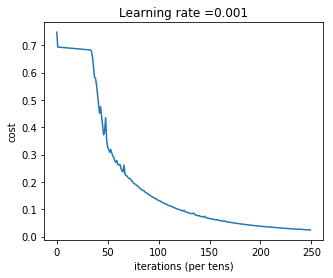

In [224]:
parameters = L_layer_model(train_x, nty, layers_dims, learning_rate=.001, num_iterations = 25000, print_cost = True)

In [225]:
predictions_train = predict(train_x, nty, parameters)

Accuracy: 0.9999999999999998


In [226]:
layers_dims

[12288, 20, 7, 5, 1]

In [227]:
train_x.shape, nty.shape

((12288, 14), (1, 14))

In [228]:
predict(train_x, nty,parameters)

Accuracy: 0.9999999999999998


array([[1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1.]])

In [229]:
nty

array([[1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1]])

In [230]:
predict(train_x[:,3:4], nty[:,3:4],parameters)

Accuracy: 1.0


array([[0.]])

In [231]:
train_x[:,3:4]

array([[0.12941176],
       [0.1372549 ],
       [0.14901961],
       ...,
       [0.90980392],
       [0.91372549],
       [0.91372549]])

In [238]:
!ls datasets

ss1-1.png
ss10-1.png
ss11-0.png
ss12-0.png
ss2-0.png
ss3-1.png
ss4-1.png
ss5-1.png
ss6-0.png
ss7-0.png
ss8-0.png
ss9-1.png
wss13-0.png
wss14-1.png


C:\Users\tmoreno\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  import sys
C:\Users\tmoreno\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  


Accuracy: 1.0
[[1.]]
y = 1.0


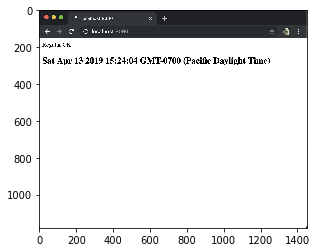

In [233]:
## START CODE HERE ##
my_image = "./datasets/ss9-1.png" # change this to the name of your image file 
my_label_y = [1] #
## END CODE HERE ##

fname = my_image #"images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((num_px*num_px*3,1))

my_image = my_image/255.

my_predicted_image = predict(my_image, my_label_y, parameters)

print(my_predicted_image)

plt.imshow(image)
print ("y = " + str(np.squeeze(my_predicted_image)))

C:\Users\tmoreno\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  import sys
C:\Users\tmoreno\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  if __name__ == '__main__':


Accuracy: 1.0
[[1.]]
y = 1.0


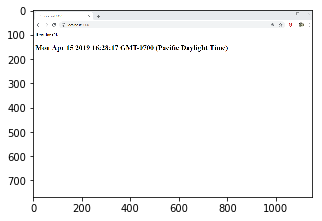

In [237]:
## START CODE HERE ##
my_image = "./tests/wss18-1.png" # change this to the name of your image file 
my_label_y = [1] 
## END CODE HERE ##

fname = my_image #"images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))

my_image = scipy.misc.imresize(image[:,:,:3], size=(num_px,num_px)).reshape((num_px*num_px*3,1))

my_image = my_image/255.

my_predicted_image = predict(my_image, my_label_y, parameters)

print(my_predicted_image)

plt.imshow(image)
print ("y = " + str(np.squeeze(my_predicted_image)))